<a href="https://colab.research.google.com/github/remz05/bertopic/blob/main/BERT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Topic Modeling with BERTopic

In [43]:
import gensim.corpora as corpora
from gensim.models.coherencemodel import CoherenceModel
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

In [1]:

data = pd.read_csv('abcnews_sample.csv')
data.head()


,publish_date,headline_text
0,20050627,lawyer claims aust govt has abandoned corby
1,20051206,singapore tells spouses of patients hiv status
2,20141119,iron ore price slumps to new five year low
3,20060203,youth crime prevention schemes share in funds
4,20190521,harry triguboff speaks to the business


In [2]:
#creating new column to see the length of the text
data['text_len'] = data['headline_text'].apply(lambda x: len(x.split()))

In [3]:
# prompt: find the max in third column
data['text_len'].max()


13

<Axes: >

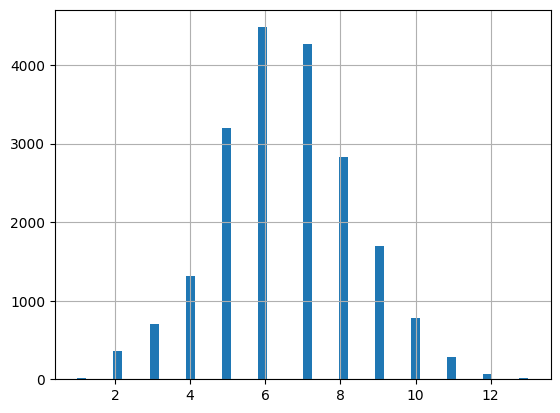

In [4]:
# prompt: create a plot for the third column to see the distribution discretely

data['text_len'].hist(bins=50)


In [5]:
#sampling 3 random rows from the dataset
for idx in data.sample(3).index:
  headline = data.iloc[idx]
  print("Headline #{}:".format(idx))
  print("Publication date: {}".format(headline['publish_date']))
  print("Text: {}\n".format(headline.headline_text))

Headline #17283:
Publication date: 20080811
Text: 46 killed in fresh sri lanka fighting military

Headline #15572:
Publication date: 20191006
Text: talking pictures

Headline #9447:
Publication date: 20081002
Text: adelaide backpacker lydia hambrook says she



In [6]:
#import warnings and Bertopic
warnings.filterwarnings("ignore")
!pip install bertopic

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.1/154.1 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 23.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.9/90.9 kB 12.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 12.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached Cython-0.29.37-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_24_x86_64.whl (1.9 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 41.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 kB 9.0 MB/s eta 0:00:00
  Created wheel for hdbscan: filename=hdbscan-0.8.33-cp310-cp310-linux_x86_64.whl size=3039285 sha256=6e0df75cdc57a93f7858ff953c4866632c077f9aa46bae45f991798291a582b5
  Stored in di

In [7]:
%%time
from bertopic import BERTopic
model = BERTopic(verbose=True,embedding_model='paraphrase-MiniLM-L3-v2', min_topic_size= 7)
headline_topics, _ = model.fit_transform(data.headline_text)

2024-01-15 05:56:44,055 - BERTopic - Embedding - Transforming documents to embeddings.


.gitattributes:   0%|          | 0.00/690 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/4.01k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/69.6M [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/314 [00:01<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

Batches:   0%|          | 0/625 [00:00<?, ?it/s]

2024-01-15 05:57:39,624 - BERTopic - Embedding - Completed ✓
2024-01-15 05:57:39,630 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2024-01-15 05:58:10,864 - BERTopic - Dimensionality - Completed ✓
2024-01-15 05:58:10,867 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-01-15 05:58:14,998 - BERTopic - Cluster - Completed ✓
2024-01-15 05:58:15,021 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-01-15 05:58:15,569 - BERTopic - Representation - Completed ✓


CPU times: user 1min 44s, sys: 3.73 s, total: 1min 48s
Wall time: 1min 55s


In [8]:
#Extracting topic's info and representation
freq = model.get_topic_info()
print("Number of topics: {}".format( len(freq)))
freq.head()

Number of topics: 438


,Topic,Count,Name,Representation,Representative_Docs
0,-1,8251,-1_to_in_for_of,"[to, in, for, of, over, after, on, the, police...","[one killed 12 injured in bus car crash, sa mu..."
1,0,408,0_fire_bushfire_firefighters_fires,"[fire, bushfire, firefighters, fires, bushfire...","[queensland bushfires tax firefighters, bushfi..."
2,1,185,1_interview_extended_brett_nathan,"[interview, extended, brett, nathan, andrew, r...","[extended interview with john coates, intervie..."
3,2,171,2_art_hollywood_artist_film,"[art, hollywood, artist, film, gallery, music,...",[australian wins best short film at cannes fil...
4,3,153,3_hospital_doctor_doctors_health,"[hospital, doctor, doctors, health, hospitals,...","[ama attacks doctor ban on hospital boards, nt..."


In [9]:
a_topic = freq.iloc[1]["Topic"] # Select the 1st topic
model.get_topic(a_topic) # Show the words and their c-TF-IDF scores

[('fire', 0.04990346534164621),
 ('bushfire', 0.03893540699892364),
 ('firefighters', 0.025707759067481527),
 ('fires', 0.023111960622407866),
 ('bushfires', 0.018266778392702698),
 ('crews', 0.01745675355954129),
 ('arson', 0.015299276057078698),
 ('burning', 0.013632267940892086),
 ('homes', 0.013336474110439625),
 ('blaze', 0.012657512699755536)]

In [10]:
#Topic Visualization
model.visualize_barchart(top_n_topics=6)

In [11]:
#Intertopic Distance Map
model.visualize_topics()

In [12]:
#visualizing the hierarchy of topics
model.visualize_hierarchy(top_n_topics=30)

In [14]:
#Searching topics similar to the input
similar_topics, similarity = model.find_topics("politics", top_n = 3)
#display the most similar topic to the word
most_similar = similar_topics[0]
print("Most Similar Topic Info: \n{}".format(model.get_topic(most_similar)))
print("Similarity Score: {}".format(similarity[0]))

Most Similar Topic Info: 
[('election', 0.0812926803010412), ('voters', 0.03392127914391776), ('voting', 0.0339194575305994), ('politics', 0.026392824102068103), ('votes', 0.024104890305964376), ('vote', 0.02252594782683643), ('postal', 0.021179540959105594), ('polls', 0.021179540959105594), ('candidate', 0.021105059845792695), ('counting', 0.017112085363086525)]
Similarity Score: 0.5910430550575256


Evaluation

In [20]:
#Createa data frame with a new column of topic number
documents = pd.DataFrame({"Document": data.headline_text,
                          "ID": range(len(data.headline_text)),
                          "Topic": headline_topics})

In [21]:
documents

,Document,ID,Topic
0,lawyer claims aust govt has abandoned corby,0,-1
1,singapore tells spouses of patients hiv status,1,103
2,iron ore price slumps to new five year low,2,212
3,youth crime prevention schemes share in funds,3,-1
4,harry triguboff speaks to the business,4,86
...,...,...,...
19995,tourist numbers down 20 percent in top end,19995,20
19996,majority of emergency beacon activations last ...,19996,399
19997,livingstone pokie reform is about people,19997,280
19998,tree clearing heats up labor,19998,-1


In [42]:
#Aggregate Documents by Topic:
documents_per_topic = documents.groupby(['Topic'], as_index=False).agg({'Document': ' '.join})

#preprocessed the aggregated data using the _preprocess_text method from topic_model.
cleaned_docs = model._preprocess_text(documents_per_topic.Document.values)

#Retrieves the vectorizer used in the topic model and constructs an analyzer function from it.
vectorizer = model.vectorizer_model
analyzer = vectorizer.build_analyzer()

#Extract Features for Topic Coherence Evaluation:
words = vectorizer.get_feature_names_out()
tokens = [analyzer(doc) for doc in cleaned_docs]

#Create Dictionary and Corpus for Gensim:
dictionary = corpora.Dictionary(tokens)
corpus = [dictionary.doc2bow(token) for token in tokens]

#extract the top words that represent the topic, as determined by the topic model
topic_words = [[words for words, _ in model.get_topic(topic)]
               for topic in range(len(set(headline_topics))-1)]

#Evaluate Topic Coherence:
coherence_model = CoherenceModel(topics=topic_words,
                                 texts=tokens,
                                 corpus=corpus,
                                 dictionary=dictionary,
                                 coherence='c_v')
coherence = coherence_model.get_coherence()

print("The Coherence score is {}".format(coherence))

The Coherence score is 0.8192419222382419


Summary
This code is evaluating the coherence of topics generated by a topic model. It does so by aggregating documents by topic, preprocessing them, creating a Gensim dictionary and corpus, and then calculating the C_v coherence score, which assesses the quality and interpretability of the topics.






In [44]:
#Now calculating the mass coherence
#Aggregate Documents by Topic:
documents_per_topic = documents.groupby(['Topic'], as_index=False).agg({'Document': ' '.join})

#preprocessed the aggregated data using the _preprocess_text method from topic_model.
cleaned_docs = model._preprocess_text(documents_per_topic.Document.values)

#Retrieves the vectorizer used in the topic model and constructs an analyzer function from it.
vectorizer = model.vectorizer_model
analyzer = vectorizer.build_analyzer()

#Extract Features for Topic Coherence Evaluation:
words = vectorizer.get_feature_names_out()
tokens = [analyzer(doc) for doc in cleaned_docs]

#Create Dictionary and Corpus for Gensim:
dictionary = corpora.Dictionary(tokens)
corpus = [dictionary.doc2bow(token) for token in tokens]

#extract the top words that represent the topic, as determined by the topic model
topic_words = [[words for words, _ in model.get_topic(topic)]
               for topic in range(len(set(headline_topics))-1)]

#Evaluate Topic Coherence:
coherence_model = CoherenceModel(topics=topic_words,
                                 texts=tokens,
                                 corpus=corpus,
                                 dictionary=dictionary,
                                 coherence='u_mass')
coherence = coherence_model.get_coherence()

print("The Mass Coherence score is {}".format(coherence))

The Mass Coherence score is -0.9760550002735191


A higher C_v score indicates that the top words of a topic frequently appear close to each other in meaningful ways, which makes the topic coherent and understandable. A lower u_mass score closer to 0 suggests that if we have a word from a topic in a document we will find the other words from the topic in the same document as well. The scores for this model looks promising

Libraries like "hyperopt" or "optuna" can be used to optimize for Hyperparameters. In a model like BERTopic which is relatively more complex, Bayesian Optimization is more effective than Grid search or Random search.

If you want to read more about BERTopic. Here is the documentation- https://maartengr.github.io/BERTopic/index.html